In [1]:
import numpy as np
import torch

Y_pred = np.load("./Y_pred_test.npy")
Y_true = np.load("./Y_true_test.npy")
Y_pred_sigmoid = torch.nn.functional.sigmoid(torch.from_numpy(Y_pred)).numpy()

genres = np.load("../data/tmdb_genres_list.pkl")

results = {}

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
import pandas as pd

def number(n):
    return "%.2f%%"%(n*100)

def sprint(*args, sep=" ", end="\n"):
    return sep.join([str(s) for s in args])+end

for i in range(len(genres)):
    pred = Y_pred[:, i]>0
    label = Y_true[:, i]
    pred_sigmoid = Y_pred_sigmoid[:, i]
    result = dict([
        ("F1", number(f1_score(label, pred))),
        ("Precision", number(precision_score(label, pred))),
        ("Recall", number(recall_score(label, pred))),
        ("AUC", number(roc_auc_score(label, pred_sigmoid))),
        ("Accuracy", number(accuracy_score(label, pred))),
    ])
    results[genres[i]] = result

df = pd.DataFrame(results, index=["F1", "Precision", "Recall", "Accuracy", "AUC"]).T
df

,F1,Precision,Recall,Accuracy,AUC
Action,50.31%,61.54%,42.55%,94.73%,86.99%
Adventure,36.64%,66.67%,25.26%,97.23%,87.94%
Animation,45.61%,71.23%,33.55%,95.87%,89.01%
Comedy,53.68%,61.69%,47.51%,85.73%,83.52%
Crime,33.92%,76.32%,21.80%,96.23%,83.47%
Documentary,56.14%,64.36%,49.79%,87.87%,85.37%
Drama,60.30%,60.21%,60.40%,74.77%,79.85%
Family,36.81%,65.22%,25.64%,96.57%,80.32%
Fantasy,32.73%,81.82%,20.45%,97.53%,85.08%
History,44.78%,100.00%,28.85%,98.77%,86.61%


1. The combined model using both plot descriptions and posters provides the best result in both validation and test set, slightly higher than RNN models with only text embedding features.

2. For the conventional machine learning models, using bag-of-word representation for text features have better predictability and it gives a result very close to our best model. The reason might be that TMDB plot discription is generally short, so simply identify certain words could be able to distinguish the genres. While using tfidf or embeddings is likely to deviate from this simple feature.  

3. Models with only poster information didn't perform well, but combine it with text features could slightly improve our model's performance. 

In [1]:
import sys
sys.path.append('../')
from modules import IO
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette("hls", 19)
%matplotlib inline

In [3]:
data_folder = '.././data/'
output_folder = '.././output/'
tmdb_genres_list = IO(data_folder + 'tmdb_genres_list.pkl').read_pickle()
movies = IO(data_folder + 'tmdb_posters.pkl').read_pickle()

In [6]:
tmdb_all = movies
#print(len(tmdb_all))
#print(tmdb_all[10])

tmdb_all_genres_count = np.zeros(len(tmdb_genres_list), dtype=int)
tmdb_overview_len = []

for m in tmdb_all:
    for i in m['genre_ids']:
        tmdb_all_genres_count[i] += 1
    tmdb_overview_len.append(len(m['overview'].split(' ')))
    
tmdb_overview_len = np.array(tmdb_overview_len)

The number of movie overviews with no less than 20 words: 20007
The number of movie overviews with no less than 50 words: 11830
The number of movie overviews with no less than 100 words: 3282


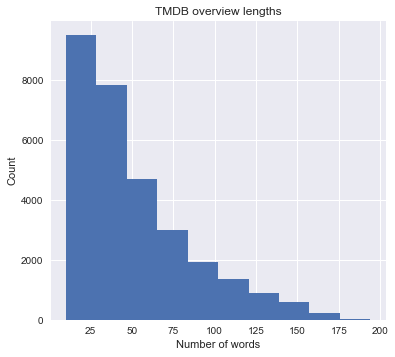

In [7]:
plt.figure(figsize=(6, 5.5))
plt.hist(tmdb_overview_len);
plt.xlabel('Number of words');
plt.ylabel('Count');
plt.title('TMDB overview lengths');
plt.savefig(output_folder + 'eda03.png', bbox_inches='tight');

print('The number of movie overviews with no less than 20 words: {}'.format(np.sum(tmdb_overview_len >= 30)))
print('The number of movie overviews with no less than 50 words: {}'.format(np.sum(tmdb_overview_len >= 50)))
print('The number of movie overviews with no less than 100 words: {}'.format(np.sum(tmdb_overview_len >= 100)))

In [2]:
text = r'''
\begin{tabular}{|c||c|c|c|c|c|} 
 \hline
  Genre & F1 & Precision &  Recall & Accuracy &     AUC \\ [0.5ex] 
 \hline\hline
'''

body = df.to_latex().splitlines()[4:-2]

text += "\n\\hline\n".join(body)
text += "\n"
text += r"\hline"
text += "\n"
text += r"\end{tabular}"

print(text)


\begin{tabular}{|c||c|c|c|c|c|} 
 \hline
  Genre & F1 & Precision &  Recall & Accuracy &     AUC \\ [0.5ex] 
 \hline\hline
Action          &  50.31\% &    61.54\% &  42.55\% &   94.73\% &  86.99\% \\
\hline
Adventure       &  36.64\% &    66.67\% &  25.26\% &   97.23\% &  87.94\% \\
\hline
Animation       &  45.61\% &    71.23\% &  33.55\% &   95.87\% &  89.01\% \\
\hline
Comedy          &  53.68\% &    61.69\% &  47.51\% &   85.73\% &  83.52\% \\
\hline
Crime           &  33.92\% &    76.32\% &  21.80\% &   96.23\% &  83.47\% \\
\hline
Documentary     &  56.14\% &    64.36\% &  49.79\% &   87.87\% &  85.37\% \\
\hline
Drama           &  60.30\% &    60.21\% &  60.40\% &   74.77\% &  79.85\% \\
\hline
Family          &  36.81\% &    65.22\% &  25.64\% &   96.57\% &  80.32\% \\
\hline
Fantasy         &  32.73\% &    81.82\% &  20.45\% &   97.53\% &  85.08\% \\
\hline
History         &  44.78\% &   100.00\% &  28.85\% &   98.77\% &  86.61\% \\
\hline
Horror          &  59.64\% &    80.5

1. All the genre have reasonable F1-score and AUC. Genre with larger sample sizes have better evaluation metrics. The classificaiton model is influenced by unbalanced data set to some degree.

2. TV Movie and Music have the worst AUC and F1 score among all genres. Both of them have limited sample size and are not closely correlated with other genres. There might not be enough training data for our model to specify their unique features.

3. There might be human error in the exisitng ground truth since it is relatively difficult to label certain correlated topics, such as horror and thriller. Therefore, considering these human error, our AUCs are within reasonable range for all genres.